# ANALYSIS

In [1]:
#uncomment this below code to install imblearn package
# !pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import sklearn

#statistics
from scipy.stats import chi2_contingency, ttest_ind

import cudf #gpu-powered DataFrame (Pandas alternative)

#imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, RepeatedEditedNearestNeighbours
from imblearn.pipeline import Pipeline

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler

#internal validation
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, PredefinedSplit

#performance metrices
from sklearn.metrics import confusion_matrix, classification_report, f1_score, balanced_accuracy_score, matthews_corrcoef, auc, average_precision_score, roc_auc_score, balanced_accuracy_score, roc_curve, accuracy_score

#Models selection
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from cuml.svm import SVC #gpu-powered SVM



#save and load trained model
import pickle

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter


In [14]:
# Data loader
features = pd.read_csv("../FinalData/data_features_10072023.csv")
outcomes = pd.read_csv("../FinalData/data_outcomes_10072023.csv")
# outcomes = outcomes[outcomes.columns[1:]]

/tmp/ipykernel_109/2953091925.py:2: DtypeWarning: Columns (23,24,26,27,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  features = pd.read_csv("../FinalData/data_features_10072023.csv")


In [18]:
features.columns

Index(['Unnamed: 0', 'patid', 'practice_id', 'sex', 'age', 'BMI', 'ethnicity',
       'smokingStatus', 'CharlsonScore', 'count_rhinitis',
       'count_cardiovascular', 'count_heartfailure', 'count_psoriasis',
       'count_anaphylaxis', 'count_diabetes', 'count_ihd', 'count_anxiety',
       'count_eczema', 'count_nasalpolyps', 'count_paracetamol',
       'count_nsaids', 'count_betablocker', 'id', 'event_date',
       'recorded_date', 'visit_id', 'code_id', 'snomed_id', 'numeric_1',
       'numeric_2', 'created_datetime', 'updated_datetime', 'PEFStatus',
       'EosinophilLevel', 'BTS_step', 'average_daily_dose_ICS',
       'prescribed_daily_dose_ICS', 'ICS_medication_possesion_ratio',
       'DeviceType', 'Spacer', 'numOCS', 'PriorEducation', 'numPCS',
       'numPCSAsthma', 'numAntibioticsEvents', 'numAntibioticswithLRTI',
       'numOCSEvents', 'numOCSwithLRTI', 'numAsthmaAttacks',
       'numAcuteRespEvents', 'numHospEvents'],
      dtype='object')

In [21]:
features

,Unnamed: 0,patid,practice_id,sex,age,BMI,ethnicity,smokingStatus,CharlsonScore,count_rhinitis,...,PriorEducation,numPCS,numPCSAsthma,numAntibioticsEvents,numAntibioticswithLRTI,numOCSEvents,numOCSwithLRTI,numAsthmaAttacks,numAcuteRespEvents,numHospEvents
0,1,43231452,39,0.0,48,26.609713,NaN,current,1.0,NaN,...,0.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,43206365,39,1.0,58,23.946360,NaN,former,1.0,0.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,43203606,559,0.0,51,17.104513,NaN,current,1.0,3.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
3,4,43117348,502,0.0,69,35.303241,NaN,former,1.0,1.0,...,0.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,43105858,536,0.0,16,28.731747,NaN,NaN,1.0,3.0,...,0.0,14.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732467,732468,65016288,867,0.0,13,144179.423282,NaN,NaN,0.0,NaN,...,0.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
732468,732469,65728252,867,1.0,20,209370.755998,NaN,current,1.0,0.0,...,0.0,7.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
732469,732470,66464892,867,0.0,61,295833.490158,NaN,NaN,1.0,0.0,...,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732470,732471,66464822,867,0.0,33,353795.777033,NaN,NaN,1.0,NaN,...,0.0,15.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
masterData = features.merge(outcomes, how = 'left', left_on='patid', right_on='patid') #join table
masterData = masterData.dropna() #NAs from Country
masterData = masterData.reset_index(drop=True)
print('original data shape: ', masterData.shape)

original data shape:  (313405, 63)


In [5]:
#Aggregate outcome for more than 3 months horizon

masterData["outcome_combined_6months"] = masterData.apply(lambda x: (x["outcome_3months"] | x["outcome_6months"]), axis=1)
masterData["outcome_combined_9months"] = masterData.apply(lambda x: (x["outcome_combined_6months"] | x["outcome_9months"]), axis=1)
masterData["outcome_combined_12months"] = masterData.apply(lambda x: (x["outcome_combined_9months"] | x["outcome_12months"]), axis=1)
masterData["outcome_combined_15months"] = masterData.apply(lambda x: (x["outcome_combined_12months"] | x["outcome_15months"]), axis=1)
masterData["outcome_combined_18months"] = masterData.apply(lambda x: (x["outcome_combined_15months"] | x["outcome_18months"]), axis=1)
masterData["outcome_combined_24months"] = masterData.apply(lambda x: (x["outcome_combined_18months"] | x["outcome_24months"]), axis=1)

In [6]:
#Positive vs negative class ratio

print('3 months -> 1 : ', round(masterData.outcome_3months.value_counts()[0]/masterData.outcome_3months.value_counts()[1],2))
print('6 months -> 1 : ', round(masterData.outcome_combined_6months.value_counts()[0]/masterData.outcome_combined_6months.value_counts()[1],2))
print('9 months -> 1 : ', round(masterData.outcome_combined_9months.value_counts()[0]/masterData.outcome_combined_9months.value_counts()[1],2))
print('12 months -> 1 : ', round(masterData.outcome_combined_12months.value_counts()[0]/masterData.outcome_combined_12months.value_counts()[1],2))
print('15 months -> 1 : ', round(masterData.outcome_combined_15months.value_counts()[0]/masterData.outcome_combined_15months.value_counts()[1],2))
print('18 months -> 1 : ', round(masterData.outcome_combined_18months.value_counts()[0]/masterData.outcome_combined_18months.value_counts()[1],2))
print('24 months -> 1 : ', round(masterData.outcome_combined_24months.value_counts()[0]/masterData.outcome_combined_24months.value_counts()[1],2))


3 months -> 1 :  16.31
6 months -> 1 :  10.44
9 months -> 1 :  7.85
12 months -> 1 :  5.68
15 months -> 1 :  4.48
18 months -> 1 :  4.0
24 months -> 1 :  3.5


In [7]:
#Proportion of asthma attack in each outcome

print('3 months -> ', round(masterData.outcome_3months.value_counts()[1]/len(masterData)*100,2), '%')
print('6 months -> ', round(masterData.outcome_combined_6months.value_counts()[1]/len(masterData)*100,2), '%')
print('9 months -> ', round(masterData.outcome_combined_9months.value_counts()[1]/len(masterData)*100,2), '%')
print('12 months -> ', round(masterData.outcome_combined_12months.value_counts()[1]/len(masterData)*100,2), '%')
print('15 months -> ', round(masterData.outcome_combined_15months.value_counts()[1]/len(masterData)*100,2), '%')
print('18 months -> ', round(masterData.outcome_combined_18months.value_counts()[1]/len(masterData)*100,2), '%')
print('24 months -> ', round(masterData.outcome_combined_24months.value_counts()[1]/len(masterData)*100,2), '%')

3 months ->  5.78 %
6 months ->  8.74 %
9 months ->  11.3 %
12 months ->  14.98 %
15 months ->  18.24 %
18 months ->  20.0 %
24 months ->  22.24 %


In [8]:
#Data scenario
# 1: all data without ethnicity variable
# 2: all data with ethnicity variable (include all missing values in ethnicity as separate group)
# 3: filter data based on ethnicity (exclude missing values)

scenario = 1 #change it based on the scenario

if scenario == 1:
    #Exclude ethnic column
    allData = masterData.drop('ethnic', axis=1)
elif scenario == 2:
    #include all data
    allData = masterData
elif scenario == 3:
    #exclude missing values for ethnic variable
    allData = masterData[masterData.ethnic!='0']
    
allData = allData.reset_index(drop=True)
print('Data shape for scenario', str(scenario), allData.shape)



Data shape for scenario 1 (313405, 68)


In [9]:
#change sex column to binary numeric, flag intersex as NAs

def sexConverter (x):
    if x == 'Female':
        return 0
    elif x == 'Male':
        return 1
    elif x == 'Intersex':
        return None
    else:
        return x

allData['sex'] = allData.apply(lambda x: sexConverter(x.sex), axis=1)
print('Intersex proportion: ', sum(allData['sex'].isnull())/allData.shape[0]*100, '%')
allData = allData.dropna(subset=['sex']) #exclude missing values (intersex)
allData = allData.reset_index(drop=True)
print('Data shape after excluding missing values in sex variable: ', allData.shape)


Intersex proportion:  0.003828911472375999 %
Data shape after excluding missing values in sex variable:  (313393, 68)


In [10]:
#Split data into training and evaluation set based on the country. Include only 18+ patients.

trainingData = allData[(allData.Country == 'England') & (allData.age>18)]
evaluationData = allData[((allData.Country == 'Scotland') | (allData.Country == 'Wales')) & (allData.age>18)] #used for internal validation

#remove country variable
trainingData = trainingData.drop('Country', axis=1)
evaluationData = evaluationData.drop('Country', axis=1)

trainingData = trainingData.reset_index(drop=True)
evaluationData = evaluationData.reset_index(drop=True)

print('Training data shape:', trainingData.shape)
print('Evaluation data shape: ', evaluationData.shape)

Training data shape: (231121, 67)
Evaluation data shape:  (10268, 67)


In [11]:
#Identify categorical and continuous variables from the dataset for preprocessing purpose

summaryData = trainingData.describe().T
excludeVars = summaryData[summaryData['max'] == 0].index.to_list() #exclude variable with all zero values
binaryVars = summaryData[summaryData['max'] == 1].index.to_list()
categoricalNonnumericVars = trainingData.select_dtypes(['object']).columns.to_list()
categoricalNonnumericVars = categoricalNonnumericVars + ['BTS_step'] #BTS step is numerical categorical

In [12]:
#Define feature candidates

features_columns = trainingData.columns.to_list()
exclude_columns = ['patid', 'practice_id', #identifier
                   'BMI', #use the categorical instead
                   'ICS_medication_possesion_ratio', #the max value is inf
                   'Spacer', 'numPCSAsthma',  #all zero
                   'outcome_3months', 'outcome_6months', 'outcome_9months', 'outcome_12months', 'outcome_15months', 'outcome_18months', 
                   'outcome_21months', 'outcome_24months', 'outcome_combined_6months', 'outcome_combined_9months', 'outcome_combined_12months', 
                   'outcome_combined_15months', 'outcome_combined_18months', 'outcome_combined_24months', #outcomes variable
                  ]
exclude_columns = exclude_columns + [x for x in features_columns if '_count' in x] #filter out commorbid count variables
features_columns = [x for x in features_columns if x not in exclude_columns]
print('Features size: ', len(features_columns))
print(features_columns)

Features size:  34
['sex', 'age', 'smokingStatus', 'CharlsonScore', 'PEFStatus', 'EosinophilLevel', 'BTS_step', 'average_daily_dose_ICS', 'prescribed_daily_dose_ICS', 'DeviceType', 'numOCS', 'PriorEducation', 'numPCS', 'numAntibioticsEvents', 'numAntibioticswithLRTI', 'numOCSEvents', 'numOCSwithLRTI', 'numAsthmaAttacks', 'numAcuteRespEvents', 'numHospEvents', 'BMI_cat', 'comorbid_anaphylaxis', 'comorbid_anxiety', 'comorbid_cardiovascular disease', 'comorbid_rhinitis', 'comorbid_eczema', 'comorbid_heart failure', 'comorbid_ischaemic heart disease', 'comorbid_nasal polyp', 'comorbid_psoriasis', 'comorbid_diabetes mellitus', 'comedication_paracetamol', 'comedication_nsaids', 'comedication_betablocker']


In [13]:
#ONE HOT encoding for categorical data

categoricalNonnumericVars = pd.Series(list(set(categoricalNonnumericVars).intersection(set(features_columns)))).tolist() #select only variables within the feature candidate list

# define one hot encoder
categoricalEncoder = OneHotEncoder(sparse=False)

# transform data
result = categoricalEncoder.fit_transform(trainingData[categoricalNonnumericVars]) 
result = pd.DataFrame(result, columns=categoricalEncoder.get_feature_names_out())

#save encoder
pickle.dump(categoricalEncoder, open('./models/categoricalEncoder.pkl', 'wb'))

# replace categorical variables in the original data with the one hot version
trainingData = pd.concat([trainingData.loc[:, ~trainingData.columns.isin(categoricalNonnumericVars)],result], axis=1)
print('Data shape after one-hot encoding: ', trainingData.shape)

/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Data shape after one-hot encoding:  (231121, 86)


In [14]:
#Scaling continous variable into 0-1 range

# summaryData = allData.describe().T
continuous_vars = summaryData[summaryData['max'] >5].index.to_list() + ['numHospEvents'] #Num hospital events is continuous with 
continuous_vars = pd.Series(list(set(continuous_vars).intersection(set(features_columns)))).tolist() #select only variables within the feature candidate list

# define scaler
scaler = MinMaxScaler()

#save scaler
pickle.dump(scaler, open('./models/scaler.pkl', 'wb'))


# transform data
result = scaler.fit_transform(trainingData[continuous_vars])
result = pd.DataFrame(result, columns=scaler.get_feature_names_out())

allData = pd.concat([trainingData.loc[:,~trainingData.columns.isin(continuous_vars)],result], axis=1)

print('Data shape after scaling: ', trainingData.shape)

Data shape after scaling:  (231121, 86)


In [15]:
#Update feature candidates

features_columns = trainingData.columns.to_list()
exclude_columns = ['patid', 'practice_id', #identifier
                   'BMI', #use the categorical instead
                   'ICS_medication_possesion_ratio', #the max value is inf
                   'Spacer', 'numPCSAsthma',  #all zero
                   'outcome_3months', 'outcome_6months', 'outcome_9months', 'outcome_12months', 'outcome_15months', 'outcome_18months', 
                   'outcome_21months', 'outcome_24months', 'outcome_combined_6months', 'outcome_combined_9months', 'outcome_combined_12months', 
                   'outcome_combined_15months', 'outcome_combined_18months', 'outcome_combined_24months', #outcomes variable
                  ]
exclude_columns = exclude_columns + [x for x in features_columns if '_count' in x] #filter out commorbid count variables
features_columns = [x for x in features_columns if x not in exclude_columns]
print('Features size: ', len(features_columns))
print(features_columns)

Features size:  53
['sex', 'age', 'CharlsonScore', 'average_daily_dose_ICS', 'prescribed_daily_dose_ICS', 'numOCS', 'PriorEducation', 'numPCS', 'numAntibioticsEvents', 'numAntibioticswithLRTI', 'numOCSEvents', 'numOCSwithLRTI', 'numAsthmaAttacks', 'numAcuteRespEvents', 'numHospEvents', 'comorbid_anaphylaxis', 'comorbid_anxiety', 'comorbid_cardiovascular disease', 'comorbid_rhinitis', 'comorbid_eczema', 'comorbid_heart failure', 'comorbid_ischaemic heart disease', 'comorbid_nasal polyp', 'comorbid_psoriasis', 'comorbid_diabetes mellitus', 'comedication_paracetamol', 'comedication_nsaids', 'comedication_betablocker', 'PEFStatus_PEF_60-80', 'PEFStatus_PEF_less than 60', 'PEFStatus_PEF_more than 80', 'PEFStatus_PEF_not recroded', 'smokingStatus_Smoking_current', 'smokingStatus_Smoking_former', 'smokingStatus_Smoking_never', 'DeviceType_DeviceType_BAI', 'DeviceType_DeviceType_DPI', 'DeviceType_DeviceType_NEB', 'DeviceType_DeviceType_pMDI', 'DeviceType_DeviceType_unknown', 'BMI_cat_Normalwei

In [16]:
#ONE HOT encoding for evaluation dataset

# transform data
result = categoricalEncoder.transform(evaluationData[categoricalNonnumericVars]) 
result = pd.DataFrame(result, columns=categoricalEncoder.get_feature_names_out())

# replace categorical variables in the original data with the one hot version
evaluationData = pd.concat([evaluationData.loc[:, ~evaluationData.columns.isin(categoricalNonnumericVars)],result], axis=1)
print('Data shape after one-hot encoding: ', evaluationData.shape)

Data shape after one-hot encoding:  (10268, 86)


In [17]:
#Scaling continous variable into 0-1 range for evaluation dataset


# transform data
result = scaler.transform(evaluationData[continuous_vars])
result = pd.DataFrame(result, columns=scaler.get_feature_names_out())

evaluationData = pd.concat([evaluationData.loc[:,~evaluationData.columns.isin(continuous_vars)],result], axis=1)

print('Data shape after scaling: ', evaluationData.shape)

Data shape after scaling:  (10268, 86)


In [ ]:
excludeDesc_columns = ['patid', 'practice_id', #identifier
                   'BMI', #use the categorical instead
                   'ICS_medication_possesion_ratio', #the max value is inf
                   'Spacer', 'numPCSAsthma',  #all zero
                   'outcome_6months', 'outcome_9months', 'outcome_12months', 'outcome_15months', 'outcome_18months',
                   'outcome_21months', 'outcome_24months', 'outcome_combined_9months', 
                   'outcome_combined_15months', 'outcome_combined_18months', 'outcome_combined_24months', #outcomes variable
                   'Country',#used for train-tes split only
                  ]
excludeDesc_columns = excludeDesc_columns + [x for x in features_columns if '_count' in x]
descData = masterData[masterData.columns.difference(excludeDesc_columns)]

In [ ]:
summaryData = descData.describe().T

In [ ]:
cat_vars = summaryData[summaryData['max'] <= 5].index.to_list() 
cat_vars.remove('numHospEvents')
cat_vars = cat_vars + categoricalNonnumericVars
cont_vars = summaryData[summaryData['max'] > 5].index.to_list() + ['numHospEvents']

In [ ]:
# writer = pd.ExcelWriter('../../code/descriptive_cat.xlsx', engine='xlsxwriter')
outcomes = ['outcome_combined_12months']
# cat_vars = ['gender_x', 'language', 'marital_status', 'ethnicity', 'admission_location', 'discharge_location']
for target_outcome in outcomes:
    desc_table = []
    print(target_outcome)
    for var in cat_vars:
        chi,pval,df,tab = chi2_contingency(pd.crosstab(descData[var].values, descData[target_outcome].values).apply(lambda c: c/c.sum(), axis=0))
        desc_table.append((var  + ' (n, % of total)','-' ,'-'))
        for group in descData[var].unique():
            noAsthma = descData[(descData[var]==group)&(descData[target_outcome]==0)].shape[0]
            noAsthmaPercent = round(noAsthma/sum(descData[target_outcome]==0)*100,2)
            asthma = descData[(descData[var]==group)&(descData[target_outcome]==1)].shape[0]
            asthmaPercent = round(asthma/sum(descData[target_outcome]==1)*100,2)
            desc_table.append((group, str(noAsthma) + ' (' + str(noAsthmaPercent) + '%)' , str(asthma) + ' (' + str(asthmaPercent) + '%)'))
    descriptive_cat = pd.DataFrame(desc_table, columns=['var','No asthma attack', 'Asthma attack'])
    # descriptive_cat.to_excel(writer, sheet_name=target_outcome)
    print('writing to Excel done!!')
# writer.save()

In [ ]:

for target_outcome in outcomes:
    desc_table_cont = []
    print(target_outcome)
    for var in descData.columns:
        if (var in cont_vars):
            tval,pval = ttest_ind(descData[var],descData[target_outcome])
            noAsthmaMean = np.round(np.mean(descData[var][descData[target_outcome]==0]),2)
            noAsthmaSD = np.round(np.std(descData[var][descData[target_outcome]==0]),2)
            asthmaMean = np.round(np.mean(descData[var][descData[target_outcome]==1]),2)
            asthmaSD = np.round(np.std(descData[var][descData[target_outcome]==1]),2)
            desc_table_cont.append((var  + ' (mean, std)', str(noAsthmaMean)  + ' (' + str(noAsthmaSD) + ')', str(asthmaMean) + ' (' + str(asthmaSD) + ')'))
    descriptive_cont = pd.DataFrame(desc_table_cont, columns=['var','No asthma attack', 'Asthma attack'])
    # descriptive_cont.to_excel(writer, sheet_name=target_outcome)
    print('writing to Excel done!!')
# writer.save()

In [ ]:
pd.concat([descriptive_cat, descriptive_cont]).to_csv(target_outcome + '.csv', index_label=False, index=False)

# UTILS

In [18]:
#Model evaluation function

def summariseResult (testX, testY, model):
    preds = model.predict(testX)
    tn, fp, fn, tp = confusion_matrix(testY, preds).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    ppv = 100*tp/(tp+fp)
    npv = 100*tn/(fn+tn)
    acc = accuracy_score(testY, preds)
    f1score = f1_score(testY, preds, average = 'binary')
    balanceacc = balanced_accuracy_score(testY, preds)
    fpr, tpr, thresholds = roc_curve(testY, preds, pos_label=1)
    aucscore = auc(fpr, tpr)
    # auc = roc_auc_score(testY, preds)
    auprc = average_precision_score(testY, preds)
    # plot_confusion_matrix(model, testX, testY, cmap='viridis')  
    return np.round(acc,4), np.round(specificity,4), np.round(sensitivity,4), np.round(aucscore,4), np.round(auprc,4), np.round(balanceacc,4), np.round(f1score,4), np.round(ppv,4), np.round(npv,4)

In [19]:
#Fix model name for visualisation

def modelNameFixer(x):
    if 'liblinear' in x:
        return 'Lasso'
    elif 'GaussianNB' in x:
        return 'GNB'
    elif 'SVC' in x:
        return 'SVC'
    elif 'RandomForest' in x:
        return 'RF'
    elif 'XGB' in x:
        return 'XGBoost'
    elif 'DecisionTree' in x:
        return 'DT'
    else:
        return 'LR'

In [20]:
#Define number of split in k-fold

n_splits = 10

In [21]:
# instantiate the model (using the default parameters)
def build_models (X_train, y_train, params, split_counter):
    models = [] #list to store all the models
    model_counter = 0
    print("Building models . . . .")

    #LR
    lr_model = LogisticRegression(class_weight='balanced', penalty='l2', random_state=1234)
    lr_model.fit(X_train,y_train)
    modelname =str(split_counter) + 'LRModel' 
    models.append([modelname, y_train.value_counts()[1]/y_train.value_counts()[0]])
    model_counter+=1
    pickle.dump(lr_model, open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'wb')) 
    print("LR done")

    #Lasso
    lasso_model = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', random_state=1234) #only the LIBLINEAR and SAGA (added in v0.19) solvers handle the L1 penalty
    lasso_model.fit(X_train, y_train)
    modelname =str(split_counter) + 'LassoModel' 
    models.append([modelname, y_train.value_counts()[1]/y_train.value_counts()[0]])
    model_counter+=1
    pickle.dump(lasso_model, open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'wb'))
    print("LR done")

    #GNB
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    modelname =str(split_counter) + 'GNBModel' 
    models.append([modelname, y_train.value_counts()[1]/y_train.value_counts()[0]])
    model_counter+=1
    pickle.dump(gnb_model, open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'wb'))     
    print("GNB done")

    #SVM
    svc_model = SVC(class_weight='balanced', C = 0.7, degree=2, kernel='poly', random_state=1234, cache_size=2048)
    svc_model.fit(X_train,y_train)
    modelname =str(split_counter) + 'SVCModel' 
    models.append([modelname, y_train.value_counts()[1]/y_train.value_counts()[0]])
    model_counter+=1
    pickle.dump(svc_model, open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'wb'))     
    print("SVM done")

    #DT
    dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=1234)
    dt_model.fit(X_train, y_train)
    modelname =str(split_counter) + 'DTModel' 
    models.append([modelname, y_train.value_counts()[1]/y_train.value_counts()[0]])
    model_counter+=1
    pickle.dump(dt_model, open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'wb'))     
    print("DT done")

    #RF
    rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=500, random_state=1234)
    rf_model.fit(X_train, y_train)
    modelname =str(split_counter) + 'RFModel' 
    models.append([modelname, y_train.value_counts()[1]/y_train.value_counts()[0]])
    model_counter+=1
    pickle.dump(rf_model, open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'wb'))     
    print("RF done")



    #XGB
    scale_pos_ratio = y_train.value_counts()[0]/y_train.value_counts()[1]
    xgb_model = xgb.XGBClassifier(objective ='binary:logistic', max_depth = params['xgb_maxdepth'], n_estimators = 2000,  tree_method='gpu_hist', gpu_id=0,  verbosity = 0, random_state = 1234,
                                 importance_type = 'gain', scale_pos_weight = scale_pos_ratio, use_label_encoder=False, learning_rate=params['xgb_lr'])
    # xgb_model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001, tree_method='gpu_hist', gpu_id=0,  verbosity = 0, random_state = 1234)
    xgb_model.fit(X_train,y_train)
    #save model
    modelname = str(split_counter) + 'XGBoostModel'
    models.append([modelname,  y_train.value_counts()[1]/y_train.value_counts()[0]])
    pickle.dump(xgb_model, open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'wb')) 
    model_counter+=1
    print("XGB done")
    
    return models
    # return [xgb_model]

# 3months

In [49]:
#Create X set for model development

target_outcome = 'outcome_3months'
X = trainingData[features_columns]
y = trainingData[[target_outcome]]
print('X shape: ', X.shape)
print('y shape: ', y.shape)

#model parameters
params = {'xgb_lr': 0.6,
         'xgb_maxdepth': 7}

X shape:  (231121, 53)
y shape:  (231121, 1)


In [50]:
%%time

#EXECUTE model training

kf = StratifiedKFold(n_splits=n_splits, random_state=1234, shuffle=True)
kf.get_n_splits(X)
models1 = pd.DataFrame(columns=['modelname', 'class_ratio'])
summary_result1 = []
cols = ['model_name', 'class_ratio', 'acc','spec','sens','auc', 'auprc', 'balance_accuracy', 'f1_score', 'ppv', 'npv']
split_counter = 0

#train model
for train_index, test_index in kf.split(X, y):
    #split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #Build models -> it can be commented if the models have been trained
    models_temp = pd.DataFrame(build_models(X_train, y_train[target_outcome], params, split_counter), columns=['modelname', 'class_ratio'])
    models1 = pd.concat([models1,models_temp]).reset_index(drop=True)
    split_counter+=1
        
#evaluate model
for modelname, classratio in models1.values:
    # print('======================================================================')
    print(modelname)
    model = pickle.load(open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'rb'))
    summary_result1.append((str(model), classratio, ) + summariseResult (X_test, y_test[target_outcome], model) )       


summary_result1 = pd.DataFrame(summary_result1, columns=cols)
summary_result1['model_num'] = summary_result1.index



Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
0LRModel
0LassoModel
0GNBModel
0SVCModel
0DTModel
0RFModel
0XGBoostModel
1LRModel
1LassoModel
1GNBModel
1SVCModel
1DTModel
1RFModel
1XGBoostModel
2LRModel
2LassoModel
2GNBModel
2SVCModel
2DTModel
2RFModel
2XGBoostModel
3LRModel
3LassoModel
3GNBModel
3SVCModel
3DTModel
3RFModel
3XGBoostModel
4LRModel
4LassoModel
4GNBModel
4SVCModel
4DTModel
4RFModel
4XGBoostModel
5LRModel
5LassoModel
5GNBModel
5SVCModel
5DTModel
5RFModel
5XGBoostModel
6LRModel
6LassoModel
6GNBModel
6SVCModel
6DTModel
6RFModel
6XGBoostModel
7LRModel
7LassoModel
7GNBModel
7SVCModel
7DTModel
7RFModel
7XGBoostModel
8LRModel
8LassoModel
8GNBModel
8SVCModel
8DTModel
8RFModel
8XGBoostModel
9LRModel
9LassoModel
9GNBModel
9SVCModel
9DTModel
9RFModel
9XGBoostModel
CPU times: user 1h 1min 58s, sys: 1min 37s, total: 1h 3min 36s
Wall time: 1h 4min 33s


In [51]:
print(target_outcome)
summary_result1['model_name'] = summary_result1.apply(lambda x: modelNameFixer(x.model_name), axis=1)
summary_result1.groupby('model_name').mean().sort_values(['auc'], ascending=False)

outcome_3months


,class_ratio,acc,spec,sens,auc,auprc,balance_accuracy,f1_score,ppv,npv,model_num
model_name,,,,,,,,,,,
XGBoost,0.065697,0.99182,0.99676,0.91656,0.95666,0.90875,0.95666,0.91965,92.45991,99.46379,37.5
DT,0.065697,0.98948,0.99428,0.91635,0.95532,0.90718,0.95532,0.91576,91.52573,99.44914,35.5
RF,0.065697,0.99393,0.99981,0.90449,0.95215,0.90807,0.95215,0.90805,96.03916,99.40844,36.5
Lasso,0.065697,0.75722,0.76507,0.63769,0.70137,0.11886,0.70137,0.24465,15.13626,96.98220,32.5
LR,0.065697,0.75650,0.76470,0.63173,0.69821,0.11742,0.69821,0.24239,14.99635,96.93297,31.5
SVC,0.065697,0.84904,0.87852,0.40042,0.63944,0.10825,0.63944,0.24649,17.80205,95.70796,34.5
GNB,0.065697,0.87659,0.91100,0.35307,0.63203,0.11289,0.63203,0.26080,20.67649,95.54180,33.5


Text(0.5, 6.79999999999999, 'Method')

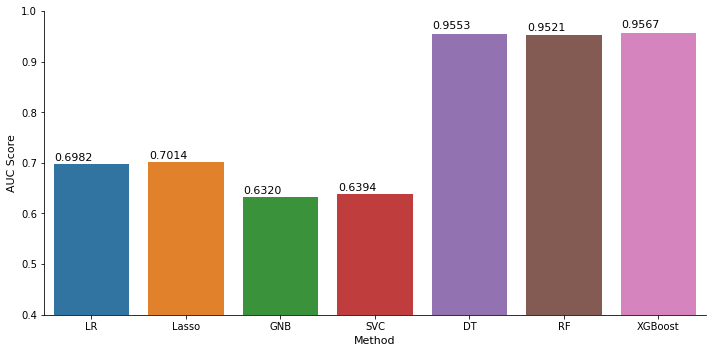

In [52]:
summary_result1.to_csv("summaryResult_outcome1.csv")
summary_result1 = pd.read_csv("summaryResult_outcome1.csv")

bar = sns.catplot(x = "model_name",       # x variable name
            y = "auc",       # y variable name            
            data = summary_result1,     # dataframe to plot
            kind = "bar",
            height=5,
            aspect=5/2.5,
            ci = None)
ax = bar.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.01, 
            '{0:.4f}'.format(p.get_height()), 
            color='black', rotation='horizontal', fontsize=11)
    
# listOf_Yticks = np.arange(0.5, 0.7, 0.05)
ax.set_ylim(0.4, 1)
ax.set_ylabel('AUC Score', fontsize=11)
ax.set_xlabel('Method', fontsize=11)

In [53]:
# kf = StratifiedKFold(n_splits=2, random_state=1234, shuffle=True)
# kf.get_n_splits(X)
# for train_index, test_index in kf.split(X, y):
#     #split data
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     trymodel = SVC(class_weight='balanced', C = 0.7, degree=2, kernel='poly', random_state=1234, cache_size=2048)
#     trymodel.fit(X_train,y_train)
#     print(summariseResult(X_test, y_test, trymodel))


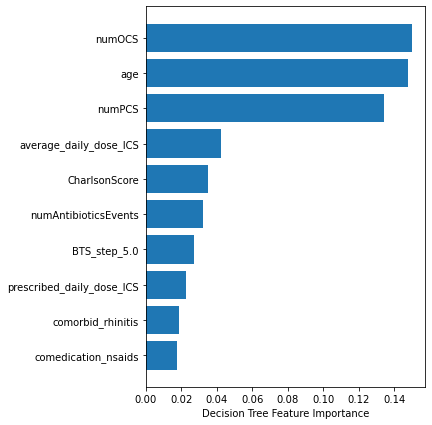

In [58]:
best_model1 = pickle.load(open('./models/outcome_3months/0DTModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model1.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model1.feature_importances_[sorted_idx][-10:])
plt.xlabel("Decision Tree Feature Importance")
plt.show()

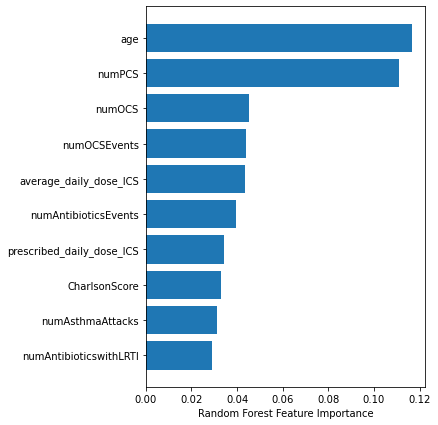

In [55]:
best_model1 = pickle.load(open('./models/outcome_3months/0RFModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model1.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model1.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")
plt.show()

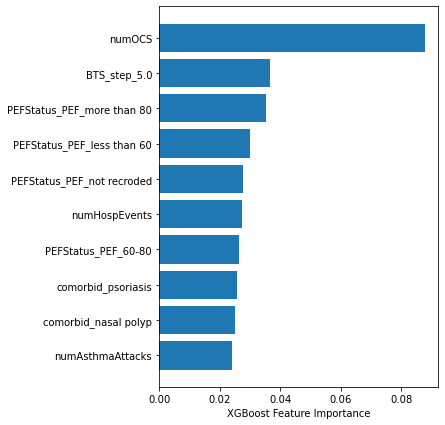

In [59]:
best_model1 = pickle.load(open('./models/outcome_3months/0XGBoostModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model1.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model1.feature_importances_[sorted_idx][-10:])
plt.xlabel("XGBoost Feature Importance")
plt.show()

# 6months

In [33]:
target_outcome = 'outcome_combined_6months'
y = trainingData[[target_outcome]]

#model parameters
params = {'xgb_lr': 0.6,
         'xgb_maxdepth': 7}

In [34]:
%%time

#EXECUTE model training

kf = StratifiedKFold(n_splits=n_splits, random_state=1234, shuffle=True)
kf.get_n_splits(X)
models2 = pd.DataFrame(columns=['modelname', 'class_ratio'])
summary_result2 = []
cols = ['model_name', 'class_ratio', 'acc','spec','sens','auc', 'auprc', 'balance_accuracy', 'f1_score', 'ppv', 'npv']
split_counter = 0

#train model
for train_index, test_index in kf.split(X, y):
    #split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #Build models -> it can be commented if the models have been trained
    models_temp = pd.DataFrame(build_models(X_train, y_train[target_outcome], params, split_counter), columns=['modelname', 'class_ratio'])
    models2 = pd.concat([models2,models_temp]).reset_index(drop=True)
    split_counter+=1
        
#evaluate model
for modelname, classratio in models2.values:
    # print('======================================================================')
    print(modelname)
    model = pickle.load(open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'rb'))
    summary_result2.append((str(model), classratio, ) + summariseResult (X_test, y_test[target_outcome], model) )       


summary_result2 = pd.DataFrame(summary_result2, columns=cols)
summary_result2['model_num'] = summary_result2.index
# summary_result1['method_name'] = summary_result1.apply(lambda x: 'LR' if x.model_num%2 == 0 else 'XGBoost', axis=1)


Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
0LRModel
0LassoModel
0GNBModel
0SVCModel
0DTModel
0RFModel
0XGBoostModel
1LRModel
1LassoModel
1GNBModel
1SVCModel
1DTModel
1RFModel
1XGBoostModel
2LRModel
2LassoModel
2GNBModel
2SVCModel
2DTModel
2RFModel
2XGBoostModel
3LRModel
3LassoModel
3GNBModel
3SVCModel
3DTModel
3RFModel
3XGBoostModel
4LRModel
4LassoModel
4GNBModel
4SVCModel
4DTModel
4RFModel
4XGBoostModel
5LRModel
5LassoModel
5GNBModel
5SVCModel
5DTModel
5RFModel
5XGBoostModel
6LRModel
6LassoModel
6GNBModel
6SVCModel
6DTModel
6RFModel
6XGBoostModel
7LRModel
7LassoModel
7GNBModel
7SVCModel
7DTModel
7RFModel
7XGBoostModel
8LRModel
8LassoModel
8GNBModel
8SVCModel
8DTModel
8RFModel
8XGBoostModel
9LRModel
9LassoModel
9GNBModel
9SVCModel
9DTModel
9RFModel
9XGBoostModel
CPU times: user 1h 11min 28s, sys: 2min 6s, total: 1h 13min 34s
Wall time: 1h 14min 55s


In [35]:
print(target_outcome)
summary_result2['model_name'] = summary_result2.apply(lambda x: modelNameFixer(x.model_name), axis=1)
summary_result2.groupby('model_name').mean().sort_values(['auc'], ascending=False)

outcome_combined_6months


,class_ratio,acc,spec,sens,auc,auprc,balance_accuracy,f1_score,ppv,npv,model_num
model_name,,,,,,,,,,,
XGBoost,0.102161,0.98771,0.99442,0.92217,0.95829,0.91211,0.95829,0.92447,92.78181,99.22415,37.5
DT,0.102161,0.98565,0.99204,0.92315,0.95759,0.91203,0.95759,0.92287,92.25371,99.21373,35.5
RF,0.102161,0.99114,0.99959,0.90849,0.95404,0.91383,0.95404,0.91493,96.72852,99.14153,36.5
Lasso,0.102161,0.75989,0.77285,0.63308,0.70299,0.17438,0.70299,0.32839,22.17008,95.37264,32.5
LR,0.102161,0.76090,0.77531,0.61998,0.69763,0.17161,0.69763,0.32472,21.99764,95.22959,31.5
GNB,0.102161,0.85759,0.90792,0.36503,0.63648,0.16414,0.63648,0.32220,28.83563,93.32958,33.5
SVC,0.102161,0.83690,0.88307,0.38516,0.63410,0.15400,0.63410,0.30454,25.18482,93.35703,34.5


Text(0.5, 6.79999999999999, 'Method')

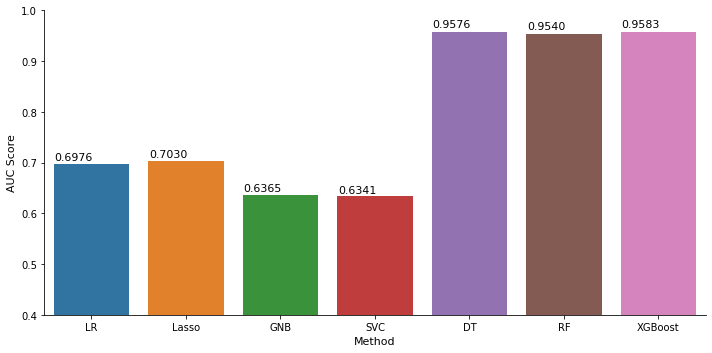

In [36]:
summary_result2.to_csv("summaryResult_outcome2.csv")
summary_result2 = pd.read_csv("summaryResult_outcome2.csv")

bar = sns.catplot(x = "model_name",       # x variable name
            y = "auc",       # y variable name            
            data = summary_result2,     # dataframe to plot
            kind = "bar",
            height=5,
            aspect=5/2.5,
            ci = None)
ax = bar.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.01, 
            '{0:.4f}'.format(p.get_height()), 
            color='black', rotation='horizontal', fontsize=11)
    
# listOf_Yticks = np.arange(0.5, 0.7, 0.05)
ax.set_ylim(0.4, 1)
ax.set_ylabel('AUC Score', fontsize=11)
ax.set_xlabel('Method', fontsize=11)

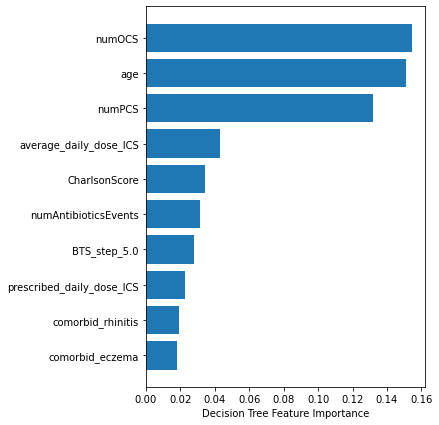

In [60]:
best_model2 = pickle.load(open('./models/outcome_combined_6months/0DTModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model2.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model2.feature_importances_[sorted_idx][-10:])
plt.xlabel("Decision Tree Feature Importance")
plt.show()

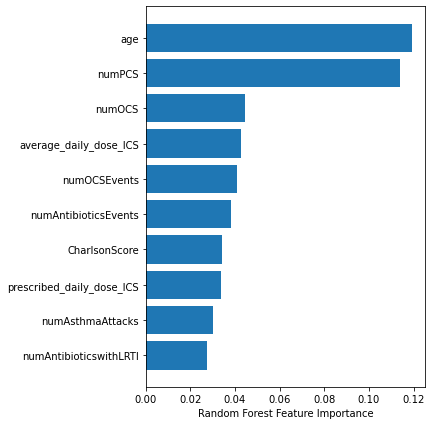

In [38]:
best_model2 = pickle.load(open('./models/outcome_combined_6months/0RFModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model2.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model2.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")
plt.show()

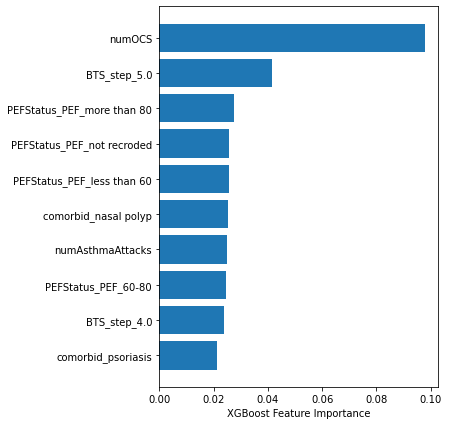

In [61]:
best_model2 = pickle.load(open('./models/outcome_combined_6months/0XGBoostModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model2.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model2.feature_importances_[sorted_idx][-10:])
plt.xlabel("XGBoost Feature Importance")
plt.show()

# 12 months

In [42]:
target_outcome = 'outcome_combined_12months'
y = trainingData[[target_outcome]]

#model parameters
params = {'xgb_lr': 0.6,
         'xgb_maxdepth': 10}

In [43]:
%%time

#EXECUTE model training

kf = StratifiedKFold(n_splits=n_splits, random_state=1234, shuffle=True)
kf.get_n_splits(X)
models3 = pd.DataFrame(columns=['modelname', 'class_ratio'])
summary_result3 = []
cols = ['model_name', 'class_ratio', 'acc','spec','sens','auc', 'auprc', 'balance_accuracy', 'f1_score', 'ppv', 'npv']
split_counter = 0

#train model
for train_index, test_index in kf.split(X, y):
    #split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #Build models -> it can be commented if the models have been trained
    models_temp = pd.DataFrame(build_models(X_train, y_train[target_outcome], params, split_counter), columns=['modelname', 'class_ratio'])
    models3 = pd.concat([models3,models_temp]).reset_index(drop=True)
    split_counter+=1
        
#evaluate model
for modelname, classratio in models3.values:
    # print('======================================================================')
    print(modelname)
    model = pickle.load(open('./models/'+ target_outcome + '/'+ modelname + '.sav', 'rb'))
    summary_result3.append((str(model), classratio, ) + summariseResult (X_test, y_test[target_outcome], model) )       


summary_result3 = pd.DataFrame(summary_result3, columns=cols)
summary_result3['model_num'] = summary_result3.index
# summary_result1['method_name'] = summary_result1.apply(lambda x: 'LR' if x.model_num%2 == 0 else 'XGBoost', axis=1)


Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
Building models . . . .


/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR done
LR done
GNB done
SVM done
DT done
RF done
XGB done
0LRModel
0LassoModel
0GNBModel
0SVCModel
0DTModel
0RFModel
0XGBoostModel
1LRModel
1LassoModel
1GNBModel
1SVCModel
1DTModel
1RFModel
1XGBoostModel
2LRModel
2LassoModel
2GNBModel
2SVCModel
2DTModel
2RFModel
2XGBoostModel
3LRModel
3LassoModel
3GNBModel
3SVCModel
3DTModel
3RFModel
3XGBoostModel
4LRModel
4LassoModel
4GNBModel
4SVCModel
4DTModel
4RFModel
4XGBoostModel
5LRModel
5LassoModel
5GNBModel
5SVCModel
5DTModel
5RFModel
5XGBoostModel
6LRModel
6LassoModel
6GNBModel
6SVCModel
6DTModel
6RFModel
6XGBoostModel
7LRModel
7LassoModel
7GNBModel
7SVCModel
7DTModel
7RFModel
7XGBoostModel
8LRModel
8LassoModel
8GNBModel
8SVCModel
8DTModel
8RFModel
8XGBoostModel
9LRModel
9LassoModel
9GNBModel
9SVCModel
9DTModel
9RFModel
9XGBoostModel
CPU times: user 1h 18min 45s, sys: 3min 33s, total: 1h 22min 19s
Wall time: 1h 24min


In [44]:
print(target_outcome)
summary_result3['model_name'] = summary_result3.apply(lambda x: modelNameFixer(x.model_name), axis=1)
summary_result3.groupby('model_name').mean().sort_values(['auc'], ascending=False)

outcome_combined_12months


,class_ratio,acc,spec,sens,auc,auprc,balance_accuracy,f1_score,ppv,npv,model_num
model_name,,,,,,,,,,,
XGBoost,0.186556,0.98205,0.99162,0.93068,0.96117,0.92242,0.96117,0.93460,94.01235,98.76574,37.5
DT,0.186556,0.97807,0.98705,0.92986,0.95848,0.91898,0.95848,0.92956,92.93249,98.69610,35.5
RF,0.186556,0.98546,0.99812,0.91756,0.95786,0.92349,0.95786,0.92719,96.53313,98.64753,36.5
Lasso,0.186556,0.75600,0.78099,0.62207,0.70152,0.27490,0.70152,0.44497,34.63696,91.71922,32.5
LR,0.186556,0.74390,0.76906,0.60891,0.68899,0.26230,0.68899,0.42782,32.98417,91.33616,31.5
GNB,0.186556,0.82133,0.90913,0.35089,0.62999,0.24897,0.62999,0.38181,41.87120,88.24471,33.5
SVC,0.186556,0.80298,0.88647,0.35558,0.62103,0.23245,0.62103,0.36208,36.88170,88.05714,34.5


Text(0.5, 6.79999999999999, 'Method')

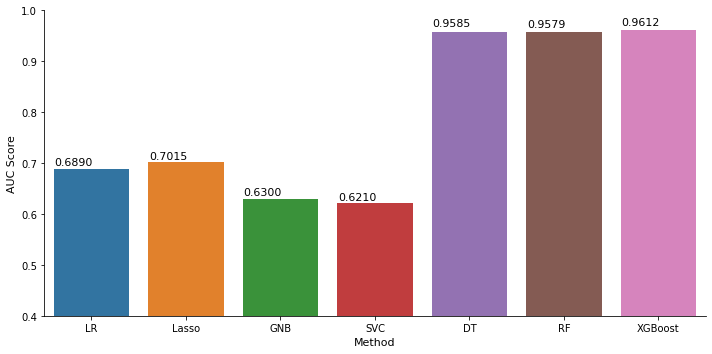

In [45]:
summary_result3.to_csv("summaryResult_outcome3.csv")
summary_result3 = pd.read_csv("summaryResult_outcome3.csv")

bar = sns.catplot(x = "model_name",       # x variable name
            y = "auc",       # y variable name            
            data = summary_result3,     # dataframe to plot
            kind = "bar",
            height=5,
            aspect=5/2.5,
            ci = None)
ax = bar.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.01, 
            '{0:.4f}'.format(p.get_height()), 
            color='black', rotation='horizontal', fontsize=11)
    
# listOf_Yticks = np.arange(0.5, 0.7, 0.05)
ax.set_ylim(0.4, 1)
ax.set_ylabel('AUC Score', fontsize=11)
ax.set_xlabel('Method', fontsize=11)

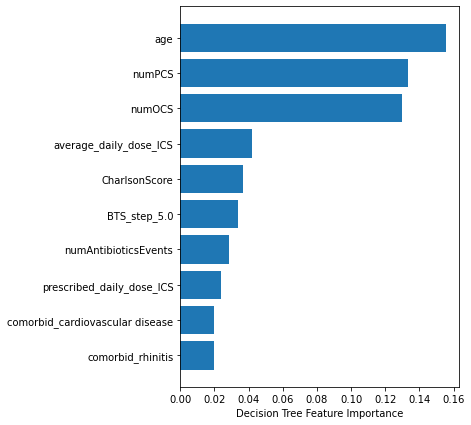

In [62]:
best_model3 = pickle.load(open('./models/outcome_combined_12months/0DTModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model3.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model3.feature_importances_[sorted_idx][-10:])
plt.xlabel("Decision Tree Feature Importance")
plt.show()

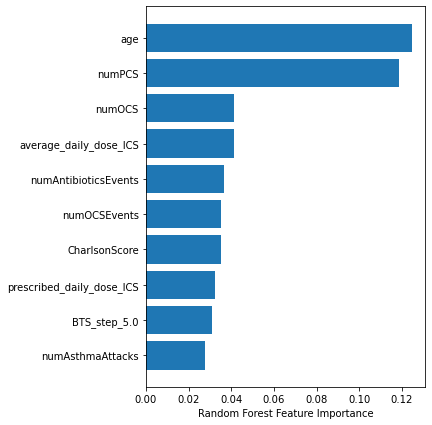

In [47]:
best_model3 = pickle.load(open('./models/outcome_combined_12months/0RFModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model3.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model3.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")
plt.show()

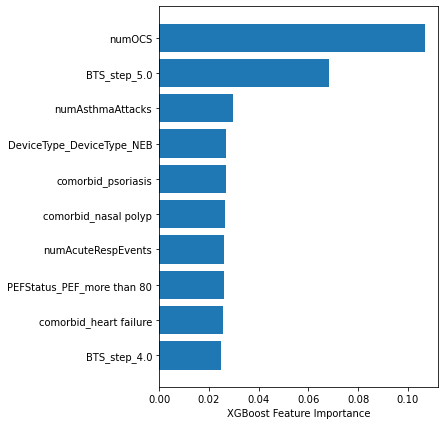

In [63]:
best_model3 = pickle.load(open('./models/outcome_combined_12months/0XGBoostModel.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model3.feature_importances_.argsort()
plt.figure(figsize=(5,7))
plt.barh(X.columns[sorted_idx][-10:], best_model3.feature_importances_[sorted_idx][-10:])
plt.xlabel("XGBoost Feature Importance")
plt.show()